In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns


#MODELS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

#Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.columns = df.columns.str.strip()


In [11]:
print(f"Unique Values in gender = {df['gender'].unique()}")
print(f"Unique Values in Race = {df['race/ethnicity'].unique()}")
print(f"Unique Values in parental level of education = {df['parental level of education'].unique()}")
print(f"Unique Values in lunch = {df['lunch'].unique()}")
print(f"Unique Values in test preparation course = {df['test preparation course'].unique()}")

Unique Values in gender = ['female' 'male']
Unique Values in Race = ['group B' 'group C' 'group A' 'group D' 'group E']
Unique Values in parental level of education = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique Values in lunch = ['standard' 'free/reduced']
Unique Values in test preparation course = ['none' 'completed']


In [12]:
print(df['math score'].nunique())
print(df['reading score'].nunique())
print(df['writing score'].nunique())

81
72
77


In [13]:
print(df['math score'].unique().mean())
print(df['reading score'].unique().mean())
print(df['writing score'].unique().mean())

59.358024691358025
62.916666666666664
61.4025974025974


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Dividing Features

In [15]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']
numeric_features = [col for col in df.columns if df[col].dtype != 'O']

In [16]:
x = df.drop(columns='math score')

In [17]:
y = df['math score']

In [18]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()
processor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)



In [19]:
x = processor.fit_transform(x)

In [20]:
x.shape

(1000, 19)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

## EVALUATION

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    score = r2_score(true, predicted)

    return mae, mse, rmse, score


In [23]:
models = {
    "Linear_Model" : LinearRegression(),
    "Ridge_Model" : Ridge(),
    "Lasso_Model" : Lasso(),
    "K-Neighbour" : KNeighborsRegressor(),
    "Logistic_Regressor" : LogisticRegression(),
    "DecisionTree" : DecisionTreeRegressor(),
    "Random_Forest" : RandomForestRegressor(),
    "Adaboost" : AdaBoostRegressor(),
    "Catboost" : CatBoostRegressor(verbose=False),
    "XgBoost" : XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculation metrics
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_score = evaluate_model(y_test, y_test_pred)

    ## PRINTING THE METRICS
     
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print(f"For Training Set")
    print(f"MAE: {model_train_mae}")
    print(f"MSE: {model_train_mse}")
    print(f"RMSE:  {model_train_rmse}")
    print(f"r2: {model_train_r2}")

    print('---------------------------------------')

    print(f"For Test Set")
    print(f"MAE: {model_test_mae}")
    print(f"MSE: {model_test_mse}")
    print(f"RMSE:  {model_test_rmse}")
    print(f"r2: {model_test_score}")
    r2_list.append(model_test_score)

    print("="*35)
    print("\n")



Linear_Model
For Training Set
MAE: 4.266711846071957
MSE: 28.33487038064859
RMSE:  5.323050852720514
r2: 0.8743172040139593
---------------------------------------
For Test Set
MAE: 4.21476314247485
MSE: 29.095169866715487
RMSE:  5.393993869732843
r2: 0.8804332983749565


Ridge_Model
For Training Set
MAE: 4.264987823725981
MSE: 28.33778823308244
RMSE:  5.323324922741654
r2: 0.8743042615212909
---------------------------------------
For Test Set
MAE: 4.211100688014261
MSE: 29.056272192348324
RMSE:  5.390387016935642
r2: 0.8805931485028737


Lasso_Model
For Training Set
MAE: 5.206302661246526
MSE: 43.47840400585579
RMSE:  6.593815587795566
r2: 0.8071462015863456
---------------------------------------
For Test Set
MAE: 5.157881810347763
MSE: 42.5064168384116
RMSE:  6.519694535667419
r2: 0.8253197323627853


K-Neighbour
For Training Set
MAE: 4.516749999999999
MSE: 32.57765
RMSE:  5.707683417990174
r2: 0.8554978341651085
---------------------------------------
For Test Set
MAE: 5.621
MSE: 

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=["R2 Score"]).sort_values(by=["R2 Score"], ascending=True)

,Model Name,R2 Score
4,Logistic_Regressor,0.656322
5,DecisionTree,0.729060
3,K-Neighbour,0.783813
2,Lasso_Model,0.825320
9,XgBoost,0.827797
8,Catboost,0.851632
6,Random_Forest,0.853120
7,Adaboost,0.853497
0,Linear_Model,0.880433
1,Ridge_Model,0.880593


## LINEAR MODEL SELECTED


In [29]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)
score = r2_score(y_pred=y_pred, y_true=y_test)
print(f"accuracy = {score}")


accuracy = 0.8804332983749565


## MAPPING THE MODELS

<Axes: xlabel='math score'>

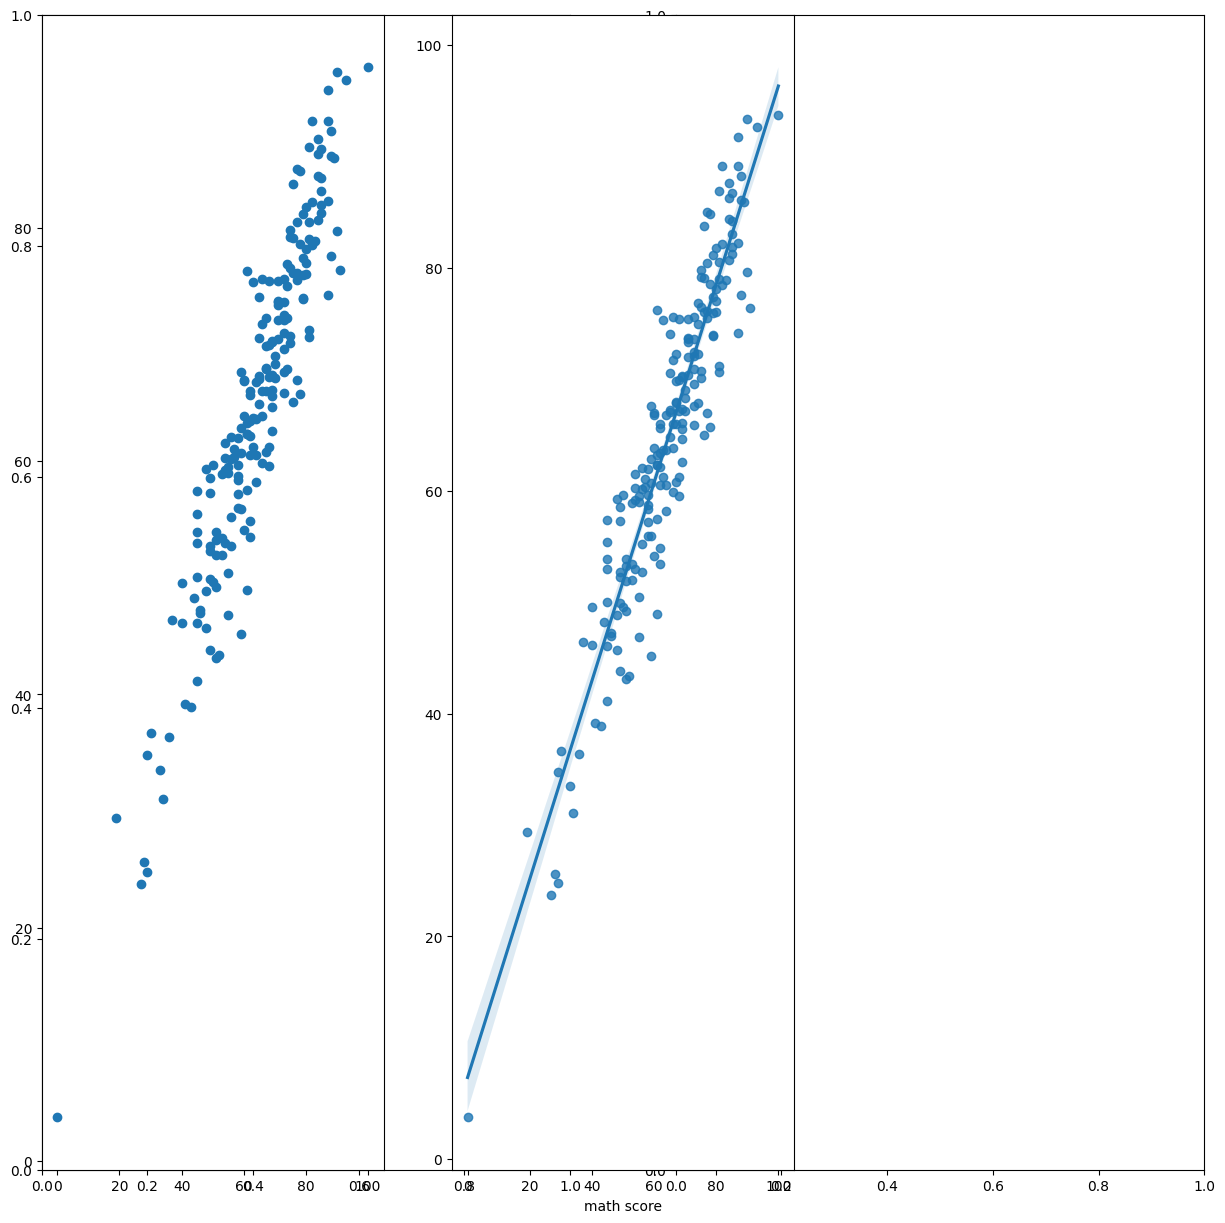

In [ ]:
plt.subplots(1, 2, figsize = (15,15))
plt.subplot(131)
plt.scatter(y=y_pred, x=y_test)
plt.subplot(132)
sns.regplot(y=y_pred, x=y_test)

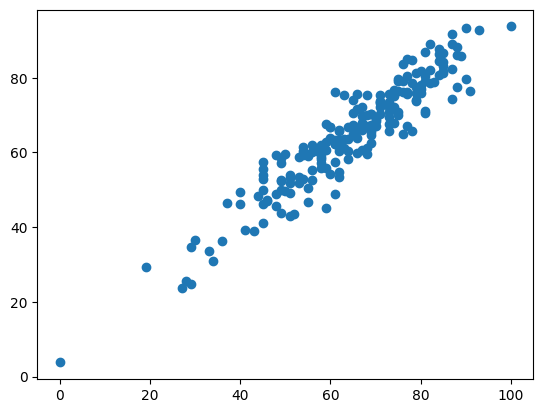

In [43]:
plt.scatter(y=y_pred, x=y_test)

<Axes: xlabel='math score'>

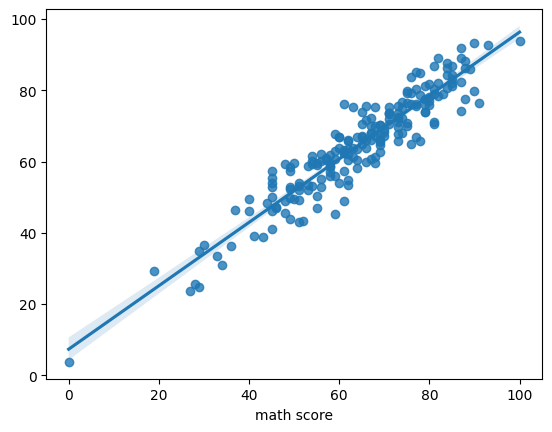

In [44]:
sns.regplot(y=y_pred, x=y_test)

In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
